In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import optimize, stats
rc('pgf', rcfonts = False, preamble = r"\usepackage{siunitx}")

# Pràctica 9: Xarxa de Difracció
## C) Calibratge de la Xarxa

Mesures de l'angle de diferents línies espectrals
* `lambda_i`: longitud d'ona que mesurem (Angstrom)
* `m_i`: ordre del màxim
* `theta_i`: llista de les mesures dels angles (grau sexagesimal)
* `epsilon_i`: angle d'incidència
* `a_i`: a que calcularem

In [3]:
theta_0 = 300.56

Línia: Primer màxim del lila dèbil

In [4]:
lambda_1   = [4046.6, 4046.6, 4078.2, 4078.2 , 4358.3, 4358.3, 4916 , 5460.7 , 5769.6, 5790.7]
m_1        = [1     , 2     , 1     , 2      , 1     , 2     , 1    , 1      , 1     , 1]
epsilon_1  = [0     , 0     , 0     , 0      , 0     , 0     , 0    , 0      , 0     , 0]
theta_1    = [281   , 258.43, 280.75, 258.016, 279.4 , 254.46, 276.5, 273.633, 271.95, 271.875]

### Calculem l'angle d'incidència
Fem una regressió entre el sinus de l'angle del primer màxim i la longitud d'ona:
$$\sin{\theta} = \frac{\lambda}{a} + \sin{\epsilon}$$

In [55]:
def sind(x):
    return np.sin(x * np.pi/180)
def cosd(x):
    return np.cos(x * np.pi/180)

In [27]:
# Seleccionem els angles que corresponen a m = 1
sins = [sind(theta_0 - theta) for m,theta in zip(m_1, theta_1) if m == 1]
longs = [l for m, l in zip(m_1, lambda_1) if m == 1]
sins, longs

([0.33479380788440566,
  0.3389021297580536,
  0.3609735972082169,
  0.4076930824488009,
  0.4528549087461492,
  0.4788450875859118,
  0.47999384466014394],
 [4046.6, 4078.2, 4358.3, 4916, 5460.7, 5769.6, 5790.7])

In [31]:
dades = []
for L in longs:
    dades += [(L, [(m,q) for m,q,l in zip(m_1, theta_1, lambda_1) if l == L])]
dades

[(4046.6, [(1, 281), (2, 258.43)]),
 (4078.2, [(1, 280.75), (2, 258.016)]),
 (4358.3, [(1, 279.4), (2, 254.46)]),
 (4916, [(1, 276.5)]),
 (5460.7, [(1, 273.633)]),
 (5769.6, [(1, 271.95)]),
 (5790.7, [(1, 271.875)])]

In [35]:
for dada in dades:
    res = r"{0[0]}".format(dada)
    for par in dada[1]:
        res += r" & {0[0]} & {0[1]:0.3f} \\".format(par) + "\n"
    res += "\\midrule"
    print(res)

4046.6 & 1 & 281.000 \\
 & 2 & 258.430 \\
\midrule
4078.2 & 1 & 280.750 \\
 & 2 & 258.016 \\
\midrule
4358.3 & 1 & 279.400 \\
 & 2 & 254.460 \\
\midrule
4916 & 1 & 276.500 \\
\midrule
5460.7 & 1 & 273.633 \\
\midrule
5769.6 & 1 & 271.950 \\
\midrule
5790.7 & 1 & 271.875 \\
\midrule


In [39]:
# fem una regressio per trobar l'angle d'incidència
def model(x, a, b):
    return a*x + b
A, sin, r, p, e = stats.linregress(longs, sins)
A, sin, r**2

(8.306418127717224e-05, -0.0007172810981020405, 0.9999419092056872)

In [26]:
params, params_err = optimize.curve_fit(model, longs, sins)
params, params_err

(array([ 8.30641813e-05, -7.17281089e-04]),
 array([[ 8.01659818e-14, -3.94188078e-10],
        [-3.94188078e-10,  1.97904254e-06]]))

In [37]:
np.sqrt(params_err[0][0]), np.sqrt(params_err[1][1])

(2.831359776514825e-07, 0.0014067844668243638)

In [54]:
ua = (1/A)**2 * np.sqrt(params_err[0][0])

In [63]:
a = 1/A
a

12038.883482919739

In [7]:
# Calculem la mitjana dels angles

a = [(m + l/10)/(sin(theta) - sin(10*pi/180)) for m, l, theta in zip(m_1, lambda_1, theta_1_corr)]
a_1 = abs(sum(a)/len(a))
show(N(a_1))

NameError: name 'sin' is not defined

## D) Constant de Rydberg

En principi hem de tenir un valor de $a$ que surt de la part anterior. Mesurem la longitud d'ona de cada línia fent-lo servir
* `lambda_2`: longituds d'ona (nm)
* `theta_2`: angle mesurat
* `epsilon_2`: angle incident
* `m_2`: ordre del màxim

In [43]:
lambda_2   = [   434,     486,     656,   434,     486]
n_2        = [     5,       4,       3,     5,       4]
m_2        = [     1,       1,       1,     2,       2]
epsilon_2  = [     0,       0,       0,     0,       0]
theta_2    = [279.43, 276.725, 267.517, 254.6, 246.825]

In [64]:
lambda_2_exp = [0.1* (a/m)*sind(theta_0 - q) for q,m in zip(theta_2, m_2)]
len(lambda_2_exp)
lambda_2_exp

[433.9839947086082,
 486.49626333148194,
 656.4421491787648,
 432.7103758784772,
 485.3414310064801]

In [65]:
lambda_2_err = [0.1*np.sqrt(((ua/m)* sind(theta_0 - q))**2 + (2*0.008*0.008)*((a/m)*cosd(theta_0 - q))**2) for q,m in zip(theta_2, m_2)]
lambda_2_err

[12.790502793867589,
 12.568671477673062,
 11.634684992532947,
 4.958639007879052,
 4.354858380846727]

[(218.8315641222828, 16140.864607871175),
 (274.9929476209003, 15522.157323746334),
 (500.67448038245465, 13035.915007164684),
 (217.54903278483886, 2241.2610482611353),
 (273.6889547710801, 1622.7901969520174)]

In [86]:
R_exp = [4*k**2/(l*(k**2 - 4)) * 10**3 for k,l in zip(n_2, lambda_2_exp)]
R_exp

[10.972535439013294,
 10.962742646389827,
 10.968217091189965,
 11.004831470096526,
 10.988827642992062]

In [71]:
R = [4*k**2/(l*(k**2 - 4)) for k,l in zip(n_2, lambda_2) ]
R

[0.010972130787798991,
 0.010973936899862825,
 0.01097560975609756,
 0.010972130787798991,
 0.010973936899862825]

In [78]:
R_err = [4*k**2/((k**2 - 4)*l**2) * u * 10**3 for k,l,u in zip(n_2, lambda_2_exp,lambda_2_err)]
R_err

[0.323385762838426,
 0.28322336922630487,
 0.19439908138951564,
 0.1261097252220289,
 0.09860025355248361]

In [46]:
lambda_2[0:3]

[434, 486, 656]

In [48]:
dades = []
for L in lambda_2[0:3]:
    dades += [(L, [(m,n, q) for n,m,q,l in zip(n_2, m_2, theta_2, lambda_2) if l == L])]
dades

[(434, [(1, 5, 279.43), (2, 5, 254.6)]),
 (486, [(1, 4, 276.725), (2, 4, 246.825)]),
 (656, [(1, 3, 267.517)])]

In [80]:
for dada in dades:
    res = r"{0[0]}".format(dada)
    for par in dada[1]:
        res += r" & ${0[1]} \to 2$ & {0[0]} & {0[2]:0.3f} \\".format(par) + "\n"
    res += "\\midrule"
    print(res)

434 & $5 \to 2$ & 1 & 279.430 \\
 & $5 \to 2$ & 2 & 254.600 \\
\midrule
486 & $4 \to 2$ & 1 & 276.725 \\
 & $4 \to 2$ & 2 & 246.825 \\
\midrule
656 & $3 \to 2$ & 1 & 267.517 \\
\midrule


In [82]:
Ry = 10.973731

In [91]:
for dada in zip(lambda_2, lambda_2_exp, lambda_2_err, R_exp, R_err, m_2):
    print(r"{0[0]} & {0[5]} & {0[1]:3.0f} \pm {0[2]:2.0f} & {0[3]:.2f} \pm {0[4]:.2f} & {1:.2f}\% \\".format(dada, 100*abs(dada[3] - Ry)/Ry))

434 & 1 & 434 \pm 13 & 10.97 \pm 0.32 & 0.01\% \\
486 & 1 & 486 \pm 13 & 10.96 \pm 0.28 & 0.10\% \\
656 & 1 & 656 \pm 12 & 10.97 \pm 0.19 & 0.05\% \\
434 & 2 & 433 \pm  5 & 11.00 \pm 0.13 & 0.28\% \\
486 & 2 & 485 \pm  4 & 10.99 \pm 0.10 & 0.14\% \\


In [92]:
np.sqrt(np.mean([u**2 for u in R_err]))

0.2228050736064005

In [94]:
np.mean(R_exp)

10.979430857936334

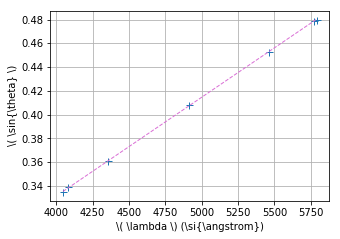

In [95]:
q = np.arange(longs[0], longs[-1], 1)
plt.figure(figsize = (5,3.5))
plt.grid(True)
plt.plot(longs, sins, marker = '+', ms = 7, mfc = 'lightblue', ls = '')
plt.plot(q, model(q, params[0], params[1]), ls = '--', color = 'orchid', lw = 1)
plt.ylabel(r"\( \sin{\theta} \)")
plt.xlabel(r"\( \lambda \) (\si{\angstrom})")

plt.savefig('regr.pgf')